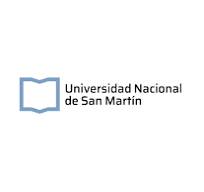

#### Procesamiento Digital de Señales - Primer cuatrimestre 2025

# Trabajo Práctico Nº2
#### Matías Cassino


# Consignas

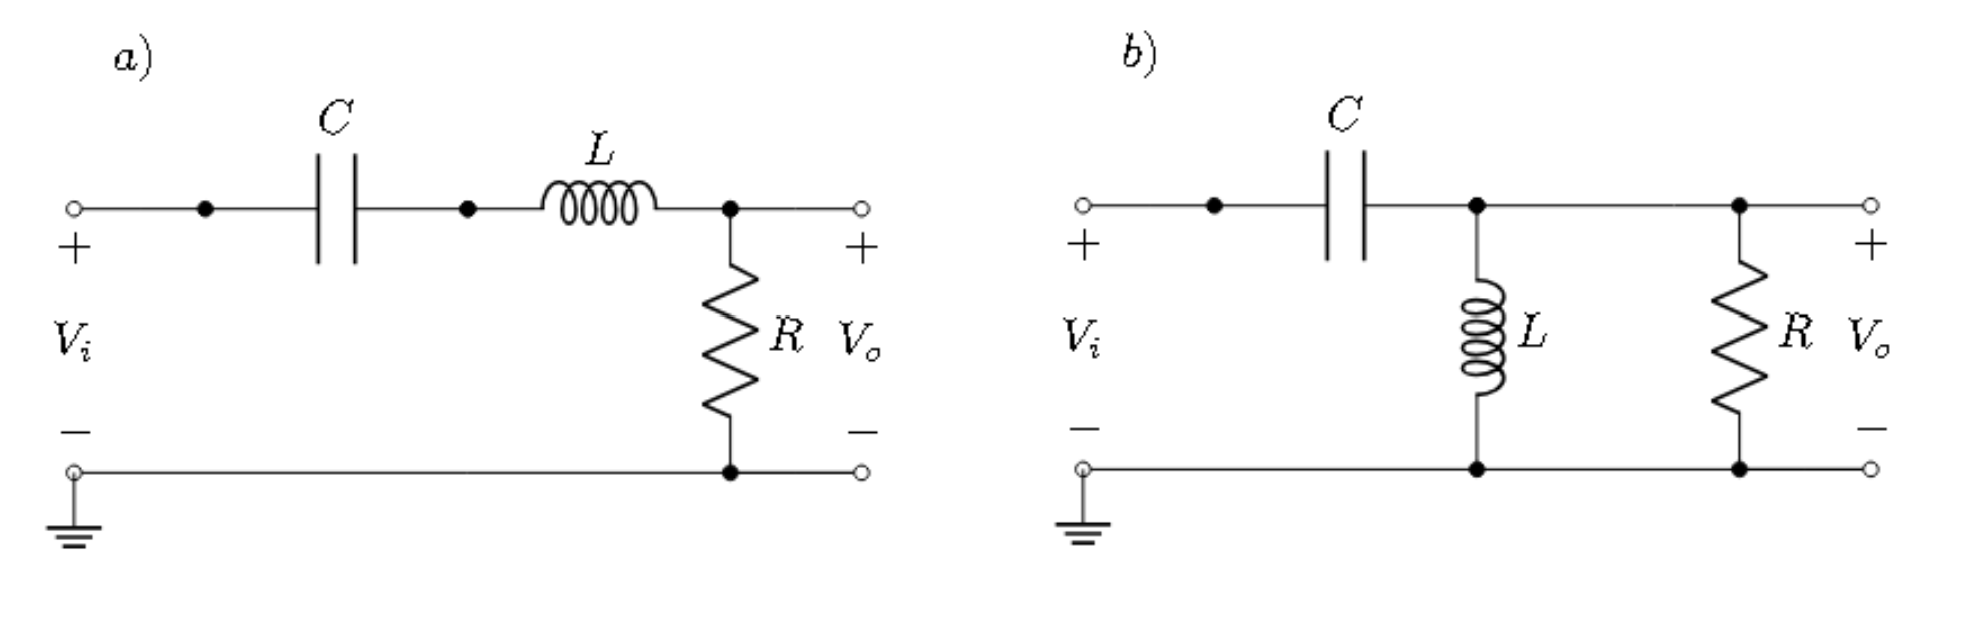

In [1]:
from IPython.display import Image
Image("circuitos.png", width=500, height=300) 

1) Hallar analíticamente la función de transferencia \begin{equation}
H(s) = \frac{Vo(s)}{Vi(s)}
\end{equation}

2) Calcular y graficar la respuesta de módulo y fase, indicando la respuesta asintótica donde corresponda.

3) Responda: ¿De qué tipo de filtro se trata? ¿Cuál es el ancho de banda del filtro?

4) Bonus 1: Cómo calcularía la salida de cada filtro (en régimen permanente) si a Vi fuera una senoidal de frecuencia arbitraria f0.

5) Bonus 2: ¿Cómo se podrían conectar en cascada ambos filtros y qué respuesta sería la resultante?

## Resolución 1

In [2]:
from IPython.display import IFrame
IFrame("consigna_1.pdf", width=1000, height=1000)


### Código asociado a la consigna 1

In [3]:
"""
Created on Mon Mar 17 12:43:56 2025

@author: Matías Cassino
"""
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import TransferFunction, bode

#%% FUNCIONES TRANSFERENCIA CONSIDERANDO L=R=C=1
numerador_a=[0, 1, 0]
denominador_a=[1, 1, 1]

numerador_b=[1, 0, 0]
denominador_b=[1, 1, 1]

H_a=TransferFunction(numerador_a, denominador_a)
H_b=TransferFunction(numerador_b, denominador_b)

#%%DETERMINACIÓN DE RESPUESTA EN MÓDULO Y FASE
w_a, modulo_a, fase_a = bode(H_a)
w_b, modulo_b, fase_b = bode(H_b)

#%%CONVIERTO FASES EN GRADOS A RADIANES
fase_a_rad=(fase_a*np.pi)/180
fase_b_rad=(fase_b*np.pi)/180


C:\Users\Nancy\AppData\Local\Programs\Python\Python312\Lib\site-packages\scipy\signal\_ltisys.py:599: BadCoefficients: Badly conditioned filter coefficients (numerator): the results may be meaningless
  self.num, self.den = normalize(*system)


### Análisis de resultados de la consigna 1
A partir de el esquema de cada circuito se ponderan las componentes de la impedancia correspondientes a los valores de la tensión/voltaje de entrada y salida junto con ciertas relaciones entre el factor de selectividad (**q**) y la pulsación natural de la red (**w0^(2)**)  para así hallar la expresión de la función transferencia en el dominio de Laplace y Fourier. 
También, se debe considerar que ambos circuitos corresponden a sistemas de orden 2 ya que el coeficiente principal del denominador es de segundo orden, el circuito A posee un cero y dos polos mientras que el circuito B presenta dos ceros y dos polos, los cuales pueden analizarse para determinar el tipo de filtro.
Además, cabe destacar que para la simplicidad de los cálculos posteriores se consideraron los parámetros correspondientes a la resistencia, la inductancia y la capacitancia con módulo unitario. 

## Resolución 2

In [4]:
IFrame("Consigna_2.pdf", width=1000, height=1000)

### Código asociado a la consigna 2

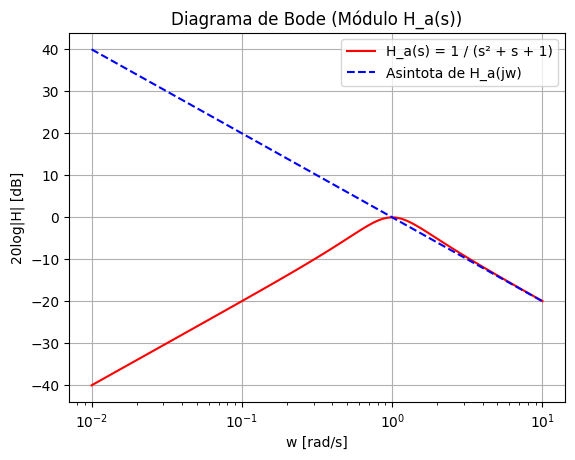

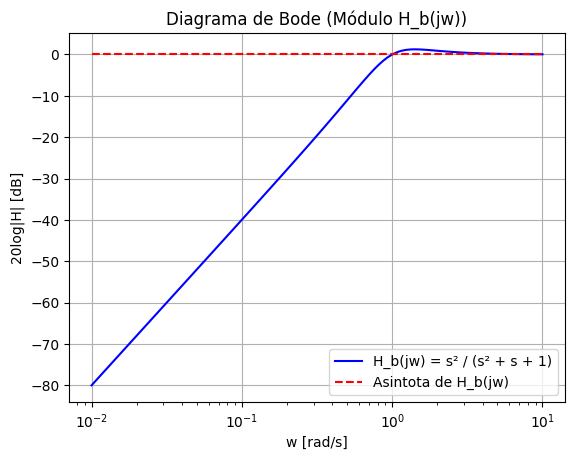

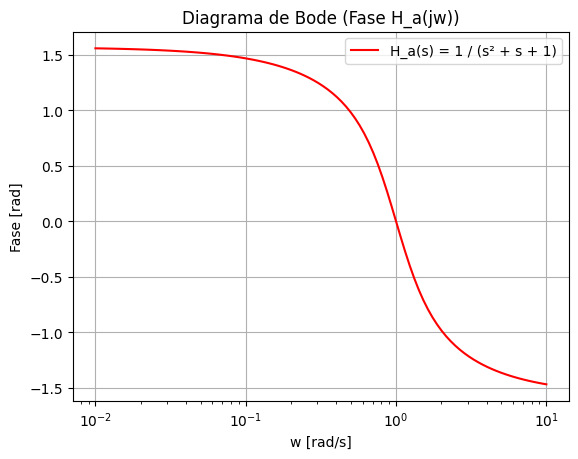

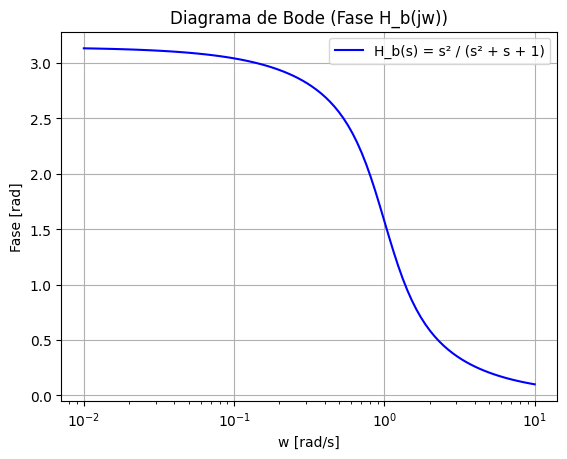

In [5]:
#%%PENDIENTE DE ASÍNTOTAS
asintota_a=-20*np.log10(w_a)
asintota_b=np.zeros_like(w_b) #array de ceros con tamaño de w_b

#%%GRÁFICOS DE MÓDULOS
plt.figure(1)
plt.semilogx(w_a, modulo_a, label='H_a(s) = 1 / (s² + s + 1)', color='red')
plt.semilogx(w_a, asintota_a, label='Asintota de H_a(jw)', color='blue', linestyle='dashed')
plt.xlabel('w [rad/s]')
plt.ylabel('20log|H| [dB]')
plt.title('Diagrama de Bode (Módulo H_a(s))')
plt.grid()
plt.legend()  

plt.figure(2)
plt.semilogx(w_b, modulo_b, label='H_b(jw) = s² / (s² + s + 1)', color='blue')
plt.semilogx(w_b, asintota_b, label='Asintota de H_b(jw)', color='red', linestyle='dashed')
plt.xlabel('w [rad/s]')
plt.ylabel('20log|H| [dB]')
plt.title('Diagrama de Bode (Módulo H_b(jw))')
plt.grid()
plt.legend()  

#%%GRÁFICO DE FASES
plt.figure(3)
plt.semilogx(w_a, fase_a_rad, label='H_a(s) = 1 / (s² + s + 1)', color='red')  
plt.xlabel('w [rad/s]')
plt.ylabel('Fase [rad]')  
plt.title('Diagrama de Bode (Fase H_a(jw))')  
plt.grid()  
plt.legend()

plt.figure(4)
plt.semilogx(w_b, fase_b_rad, label='H_b(s) = s² / (s² + s + 1)', color='blue') 
plt.xlabel('w [rad/s]')
plt.ylabel('Fase [rad]')  
plt.title('Diagrama de Bode (Fase H_b(jw))')  
plt.grid()  
plt.legend()

### Análisis de resultados de la consigna 2
En función de los gráficos del módulo y la fase de la función transferencia del circuito A se identifica que el módulo posee una magnitud pequeña para altas y bajas frecuencias, por ende, impide el paso de tales, pero alcanza un máximo en frecuencias intermedias. En adición, el comportamiento asintótico para bajas frecuencias tiene un valor de 40 dB/dec y para altas una magnitud de -40 dB/dec. Además, la fase describe un cambio de 180° desde 90° para bajas frecuencias hasta -90° en altas frecuencias, en efecto, en los valores intermedios la señal no se desfasa.

Por otra parte, el circuito B exhibe un valor reducido para pequeñas frecuencias, es decir, bloquea las mismas, y para frecuencias intermedias y altas se estabiliza permitiendo su paso. A su vez, la pendiente asociada a la asíntota del sistema para bajas frecuencias se corresponde a 40 dB/dec mientras que para altas frecuencias su valor es nulo. También, la fase comienza el 180° para bajas frecuencias pero disminuye a 0° para altas dado que el desfase se reduce progresivamente.

## Resolución 3

In [13]:
IFrame("Consigna_3.pdf", width=1000, height=1000)

### Análisis de resultados de la consigna 3
Considerandos el comportamiento del capacitor y el inductor para valores de frecuencias tendiendo a cero e infinito, se logró determinar que en el circuito A solo pasan las frecuencias intermedias y en el circuito B está permitido el paso de frecuencias altas, por lo tanto, el circuito A corresponde a un filtro pasa banda y el circuito B pertenece a un filtro pasa altos.

Por otra parte, el ancho de banda de cada uno de los filtros se obtuvo considerando la frecuencia de corte, es decir, la frecuencia para la cual la función transferencia alcanza los -3 dB. En el filtro pasa banda se obtuvieron dos frecuencias las cuales limitan el rango de frecuencias admitidas, y en el filtro pasa altos se dedujo una frecuencia que indica el límite inferior del rango admitido.

## Resolución bonus 1

In [7]:
IFrame("Bonus_1.pdf", width=1000, height=1000)

## Análisis de resultados de la consigna bonus 1
La salida del sistema puede calcularse ponderando:
1) la relación \begin{equation}V_o(s) = {Vi(s)} {H(s)}\end{equation}
2) una señal de entrada senoidal de tipo \begin{equation}V_o(t) = A \sin(2\pi f_0 t)\end{equation} donde A representa la amplitud
   
3) la señal de salida en estado esttacionario posee la frecuencia f0 de la señal de entrada pero distinta fase y amplitud a causa de la función transferencia.


## Resolución bonus 2

In [8]:
IFrame("Bonus_2.pdf", width=1000, height=1000)

## Análisis de resultados de la consigna bonus 2
La disposición de ambos filtros en cascada en forma pasa banda - pasa altos o viceversa resulta en un filtro pasa banda que acentúa la eliminación de frecuencias pequeñas. Por su parte, la respuesta del sistema puede hallarse considerando la relación entre la salida del primer filtro y la entrada del segundo, lo cual deriva en que la función transferencia del sistema LTI en cascada consista en el producto de las transferencias de cada filtro, por ende: 
\begin{equation}H_{total}(s) = H_a(s) H_b(s)\end{equation}


## Conclusiones
Finalmente, valiéndose de los gráficos de módulo y fase derivados de las funciones de transferencia de cada circuito, se pudo determinar parámetros característicos como el tipo de filtro, la pendiente de la respuesta asintótica en los extremos de la frecuencia, y el ancho de banda. A su vez, los ítems "bonus" permitieron estudiar el valor de una señal de salida en estado estacionario a efectos de una señal de entrada senoidal, y analizar la transferencia resultante de la conexión en cascada de ambos filtros. 
Principalmente, pude comprender el análisis de la asíntota del sistema haciendo tender la frecuencia a sus extremos, y la demarcación analítica del ancho de banda.
Con respecto a los recursos utilizados, personalmente contrasté los resultados con los ejercicios de clase y los desarrollos conceptuales del libro "Digital signal processing" de Thomas Holton, y empleé la IA en las funciones de ploteo en escala logarítmica y la demarcación de las asíntotas a partir de un nuevo vector. 